In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.manifold import TSNE
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.naive_bayes import GaussianNB

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
# Any results you write to the current directory are saved as output
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['creditcard.csv']


**Data set description:**

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

 **Here we will apply three different machine learning processes:**

1. Supervised Learning is a process of training a machine learning model on a labelled dataset ie. a dataset in which the target variable is known. In this technique, the model aims to find the relationships among the independent and dependent variable. Examples of supervised learning are classification, regression and forecasting. 

2. Unsupervised Learning is a process of training a machine learning model on a dataset in which target variable is not known. In this technique, the model aims to find the most relevant patterns in the data or the segments of data. Examples of unsupervised learning are clustering, segmentations, dimensionality reduction etc. 

3. Semi-Supervised Learning is combination of supervised and unsupervised learning processes in which the unlabelled data is used for training a model as well. In this approach, the properties of unspervised learning are used to learn the best possible representation of data and the properties of supervised learning are used to learn the relationships in the representations which are then used to make predictions.

In [2]:
data = pd.read_csv('../input/creditcard.csv') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df2=df

In [3]:
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Check if there any Null Values!
df.isnull().sum().max()

0

In [6]:
# Normalization Amount
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
df1=df


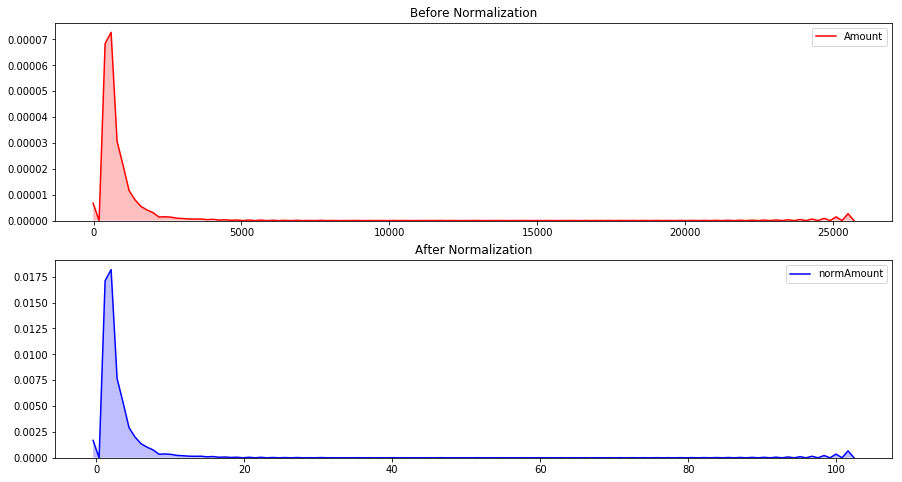

In [7]:
#make sure there are no change in distribution 
f, (ax1, ax2) = plt.subplots(2,1,figsize =( 15, 8))

sns.kdeplot(data['Amount'],shade=True, ax = ax1, color='red')
ax1.set_title('Before Normalization')

sns.kdeplot(data['normAmount'],shade=True, ax = ax2, color='blue')
ax2.set_title('After Normalization')

plt.show()

In [8]:
# Drop useless variables
df = df.drop(['Amount','Time'],axis=1)

In [9]:
df.columns


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')

In [10]:
# The classes imbalanced.The problem here is Imbalanced Data set lead to biased to the majority class
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


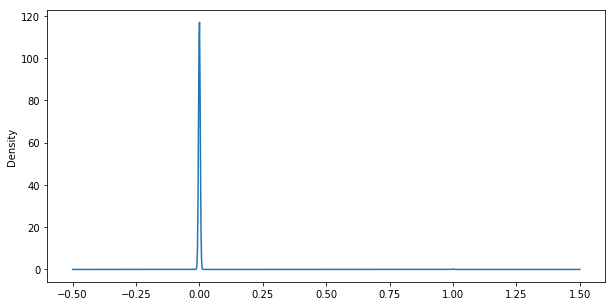

In [11]:
df['Class'].plot(kind="density", figsize=(10,5))

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

![](http://)**Consider only 10000 rows of non fraud cases**

In [13]:
non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

df1 = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df1.drop(['Class'], axis = 1).values
Y = df1["Class"].values

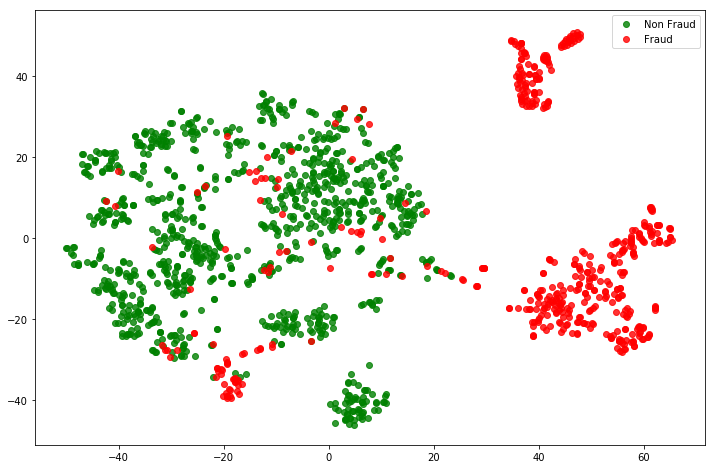

In [14]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

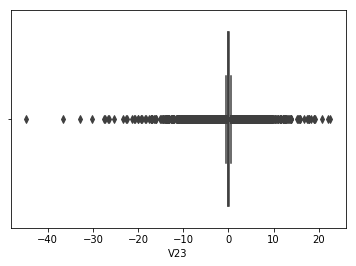

In [15]:
sns.boxplot(x=df['V23'])

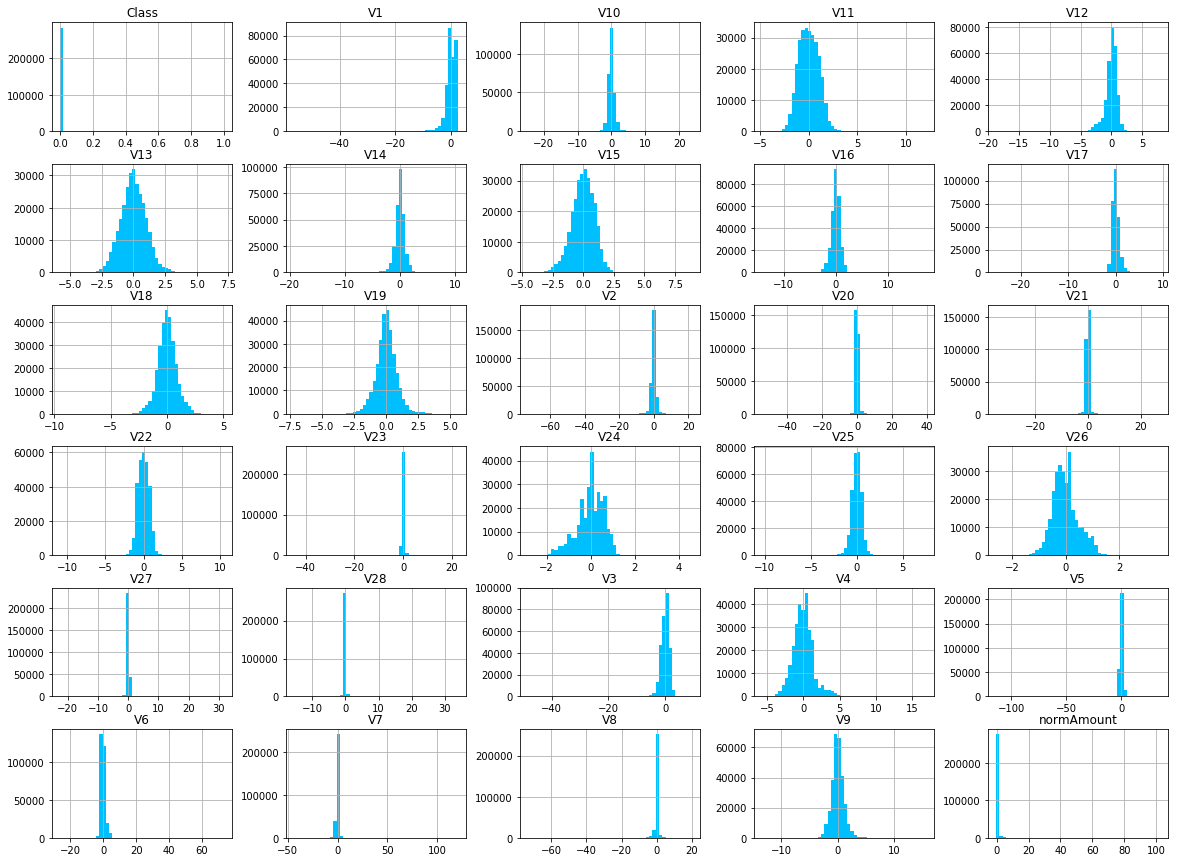

In [16]:
# Graph distribution
df.hist (bins=50, figsize=(20,15), color = 'deepskyblue')

plt.show()

In [17]:
#Create Train and Test Sets before dealing with imbalanced data
# Prepare data for modeling
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [18]:
# Train model logistic Reg in imbalanced data
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [19]:
# Checking accuracy
accuracy_score(y_test, lr_pred)

0.9992275552122467

In [20]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    85336
1      107
Name: 0, dtype: int64

In [21]:
y_test.value_counts()

0    85294
1      149
Name: Class, dtype: int64

In [22]:
#f1_scor is a suitable measure of models tested with imbalance datasets
f1_score(y_test, predictions, average='macro')

0.8709003490740199

In [23]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,85282,12
1,54,95


**as above high biased to the majoriy class**

**Deal with imbalanced data by using Resampling Techniques**

- Oversampling Minority Class:  Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

In [24]:
#Dealing with imbalance problem first method
from sklearn.utils import resample


In [25]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [26]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
264873,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,-0.343885,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,-0.342275,0
163821,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,0.443750,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,-0.199543,0
72083,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,-0.113006,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,-0.349231,0
196949,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,0.334537,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,-0.201742,0
126213,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,0.754427,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,0.594317,0


In [27]:
X['Class'].value_counts()

0    213245
1       360
Name: Class, dtype: int64

In [28]:
# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

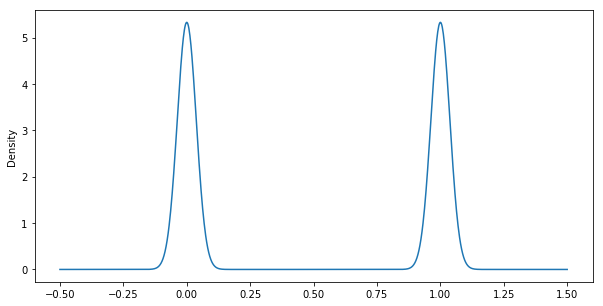

In [29]:
#plot the distribution after applying upsameling 
upsampled['Class'].plot(kind="density", figsize=(10,5))

In [30]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [31]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9778377011881688

In [32]:
# f1 score
f1_score(y_test, upsampled_pred)

0.1281767955801105

In [33]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,69508,1562
1,16,116


1. **Our accuracy score decreased after upsampling, but the model is now predicting both classes more equally**

In [34]:
recall_score(y_test, upsampled_pred)


0.8787878787878788

**Try Undersampling Majority Class**
- Undersampling can be defined as removing some observations of the majority class.

In [35]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [36]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [37]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9637650627791354

In [38]:
# f1 score
f1_score(y_test, undersampled_pred)

0.08315565031982942

In [39]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,68505,2565
1,15,117


In [40]:
recall_score(y_test, undersampled_pred)

0.8863636363636364

**Downsampling produced a higher recall score than upsampling! My concern here is the small number of total samples we used to train the model**

**Finally Apply SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.**

In [41]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [42]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9769950282295441

In [43]:
# f1 score
f1_score(y_test, smote_pred)

0.125

In [44]:
recall_score(y_test, smote_pred)


0.8863636363636364

In [45]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,69447,1623
1,15,117


1. **XGB - Grid Search CV to find best n_estimators (F1_score)**

In [46]:
import xgboost as xgb

In [47]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)


In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'n_estimators': [50, 100]}

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=50 .................................................


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.8s remaining:    0.0s


[CV] .................................. n_estimators=50, total=  36.2s
[CV] n_estimators=50 .................................................


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] .................................. n_estimators=50, total=  36.1s
[CV] n_estimators=50 .................................................


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] .................................. n_estimators=50, total=  36.0s
[CV] n_estimators=100 ................................................


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ................................. n_estimators=100, total= 1.2min
[CV] n_estimators=100 ................................................


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ................................. n_estimators=100, total= 1.3min
[CV] n_estimators=100 ................................................


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.5min finished


[CV] ................................. n_estimators=100, total= 1.2min
The best parameters for using this model is {'n_estimators': 100}


In [53]:
 CV_xgb_cfl.cv_results_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([35.81989765, 72.45852621]),
 'mean_score_time': array([0.27999322, 0.58746243]),
 'mean_test_score': array([0.96428892, 0.98339079]),
 'mean_train_score': array([0.96465114, 0.98404552]),
 'param_n_estimators': masked_array(data=[50, 100],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50}, {'n_estimators': 100}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.96424366, 0.98339406]),
 'split0_train_score': array([0.96408311, 0.98374527]),
 'split1_test_score': array([0.96422937, 0.98442786]),
 'split1_train_score': array([0.96471238, 0.9849994 ]),
 'split2_test_score': array([0.96439373, 0.98235045]),
 'split2_train_score': array([0.96515793, 0.98339188]),
 'std_fit_time': array([0.07861102, 2.89492468]),
 'std_score_time': array([0.00427584, 0.01029969]),
 'std_test_score': array([7.43428923e-05, 8.48101504e-04]),
 'std_train_score': array([0.00044093, 0.000689

[](http://)**XGB - With best hyperparameters**

In [54]:
# xgb
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,n_estimators = 100)

xgb_cfl.fit(X_train, y_train)






XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [55]:
X_train.shape,X_test.shape

((426490, 29), (71202, 29))

In [56]:
X_test=np.array(X_test)

In [57]:
y_pred = xgb_cfl.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [58]:
y_score = xgb_cfl.predict_proba(X_test)[:,1]

In [59]:
# f1 score
f1_score(y_test, y_pred)

0.22947576656775473

In [60]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

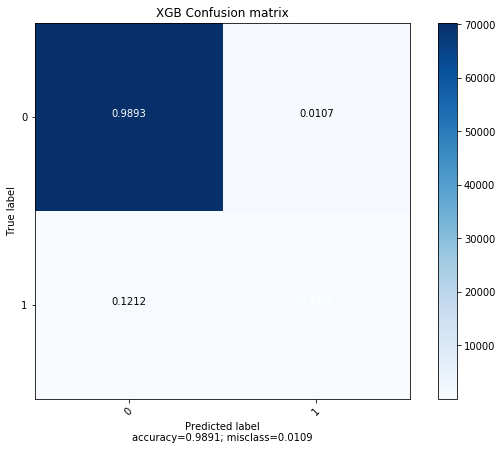

In [61]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'XGB Confusion matrix')
plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()





In [62]:
from sklearn import metrics
def buildROC(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

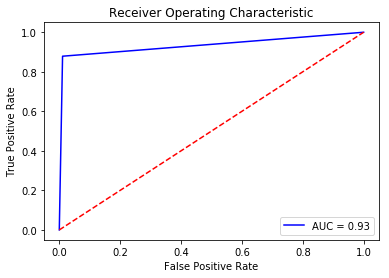

In [63]:
buildROC(y_test, y_pred)

[](http://)**Try More ML models with hyper prameter tunnig**

In [64]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []

**Logistic regression**

In [65]:
logi_clf = LogisticRegression(solver='lbfgs', max_iter=500)
logi_parm = {"C": [0.1, 1]}

In [66]:
logi_clf = GridSearchCV(estimator = logi_clf, param_grid = logi_parm, scoring ='f1', verbose = 2)
logi_clf.fit(X_train, y_train)
clfs_opt.append(logi_clf.best_estimator_)
clfs_best_scores.append(logi_clf.best_score_)
clfs_best_param.append(logi_clf.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   3.6s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ............................................ C=0.1, total=   3.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   4.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   3.9s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   5.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.4s finished


**SVM ----> we will not be able to run this cell to tune hyper prameter this lead to restart this session in terms of limitted resources although we used GPU  **

In [ ]:
svm_clf = SVC(probability=True)
svm_parm = {'kernel': ['rbf', 'poly'], 'C': [ 50, 100]}


In [ ]:
svm_clf = GridSearchCV(estimator = svm_clf, param_grid = svm_parm, scoring ='f1', verbose = 2)
svm_clf.fit(X_train, y_train)
clfs_opt.append(svm_clf.best_estimator_)
clfs_best_scores.append(svm_clf.best_score_)
clfs_best_param.append(svm_clf.best_params_)

**DecisionTreeClassifier---> we will not be able to tune all prameters in the same reason**

In [67]:
dt_clf = DecisionTreeClassifier()
dt_parm = {'criterion':['entropy']}

In [68]:
dt_clf = GridSearchCV(estimator = dt_clf, param_grid = dt_parm, scoring ='f1', verbose = 2)
dt_clf.fit(X_train, y_train)
clfs_opt.append(dt_clf.best_estimator_)
clfs_best_scores.append(dt_clf.best_score_)
clfs_best_param.append(dt_clf.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] criterion=entropy ...............................................
[CV] ................................ criterion=entropy, total=  23.3s
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s


[CV] ................................ criterion=entropy, total=  23.4s
[CV] criterion=entropy ...............................................
[CV] ................................ criterion=entropy, total=  26.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished


In [69]:
max(clfs_best_scores)


0.9984256020631317

In [70]:

arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]

{'criterion': 'entropy'}

**Apply clustering algorithms **

In [71]:
# Split the data into train set and test set
train,test = train_test_split(df2,test_size=0.3,random_state=0)

In [72]:
# Get the arrays of features and labels in train dataset
features_train = train.drop(['Time','Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Time','Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import adjusted_rand_score

model = KMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 
true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)


False


**k-means Evaluation**

In [74]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[83741  1555]
 [  142     5]]
kmeans_precison_score: 0.003205128205128205
kmeans_recall_score: 0.034013605442176874
kmeans_accuracy_score: 0.9801388059876175
kmeans_f1_score: 0.0058582308142940825


In [75]:
labels_test.shape,labels_test_predicted.shape

((85443, 1), (85443,))

In [76]:
labels_test=np.concatenate(labels_test)

In [77]:
adjusted_rand_score(labels_test,labels_test_predicted)  #accurcy of clustering of original dat

0.0026669775619586286

> **Apply GMM algorithmwe will not be able to tune all prameters in the same reason**

In [ ]:
from sklearn.mixture import GaussianMixture


In [ ]:
gmm = GaussianMixture(n_components=2).fit(features_train)
labels_gmm = gmm.predict(features_test)

In [ ]:
adjusted_rand_score(labels_gmm,labels_test)   #accurcy of clustering of original dat

In [ ]:
# Calculating confusion matrix for GMM
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

**Hierarchical Clustering-------> we can not run this cell requried a heavy process lead to restart this Session **

In [ ]:
from scipy.cluster.hierarchy import dendrogram , ward,single
linkage = ward(features_train)
plt.figure(figsize=(15,10))
dendrogram(linkage)

plt.show()

 **DBScan-------> we can not run this cell as well requried a heavy process lead to restart this Session**

In [ ]:
from sklearn.cluster import SpectralClustering


In [ ]:
sp = SpectralClustering(n_clusters=2)
labelsDB = sp.fit_predict(features_train)

**Further methods in clustering**

- We can apply dimension reduction before applying clustering algorithms that may lead to improve the accurcy as we saw in  the previous clustering assignment

**developing unsupervised generative models **

**1.Variational Autoencoder (VAE)**

In [78]:
X1_train, X1_test  = train_test_split(df2, test_size=0.25)

In [79]:
data['Amount'].skew()

16.977724453761024

In [80]:
X1_train.loc[:,"Time"] = X1_train["Time"].apply(lambda x : x / 3600 % 24)#transform the Time field to time-of-day to account 
X1_train.loc[:,'Amount'] = np.log(X1_train['Amount']+1) #The Amount field is transformed to log scale deal with

X1_test.loc[:,"Time"] = X1_test["Time"].apply(lambda x : x / 3600 % 24)
X1_test.loc[:,'Amount'] = np.log(X1_test['Amount']+1)
# data = data.drop(['Amount'], axis = 1)
print(X1_train.shape)
X1_train.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(213605, 32)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
154597,4.373056,-3.738176,1.889061,-0.975886,-0.761875,1.116344,-1.076670,0.941142,-0.423510,3.567608,...,-1.124409,-0.162401,0.482692,-0.086991,0.015785,0.207446,-0.525539,2.301585,0,-0.317287
265953,21.032778,2.102763,-0.039457,-1.348526,0.239496,0.276490,-0.715611,0.191836,-0.294867,0.506660,...,-0.760499,0.253805,-0.699557,-0.201935,0.242650,-0.065002,-0.066410,1.091923,0,-0.345313
223325,15.815278,-2.411328,0.737095,-0.150493,-2.775720,-0.168994,0.937487,-0.777808,1.718994,0.206863,...,0.952264,-0.377296,-1.537624,-0.101586,0.643824,-0.161352,-0.214985,4.262680,0,-0.073363
21472,8.803333,-0.494190,0.426818,1.781205,0.864511,-0.291618,0.613979,0.589818,0.217015,-0.054334,...,0.279173,-0.076899,0.032224,0.326499,-0.329630,0.049241,0.025849,4.627421,0,0.051577
233348,16.981389,-2.553440,-3.186669,-0.554834,0.121624,1.943142,-1.761762,-1.184291,0.601434,0.557887,...,0.958217,0.604393,0.517981,-2.007349,-0.147041,0.236549,-0.196756,4.973971,0,0.220896


In [81]:
X1_train = X1_train[X1_train.Class == 0] # train the model on normal transactions
X1_train = X1_train.drop(['Class'], axis=1)

y1_test = X1_test['Class']
X1_test  = X1_test.drop(['Class'], axis=1) #drop the class column


#transform to ndarray
X1_train = X1_train.values
X1_test = X1_test.values
X1_train.shape

(213222, 31)

In [82]:
#Build Model
#The first two layers are used for encoder, the last two go for the decoder.
#Use L1 regularization during training

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X1_train.shape[1] #num of columns, 29
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, 
                activation="tanh", 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


Using TensorFlow backend.


In [83]:
nb_epoch = 300
batch_size = 128
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error',optimizer='adam')


tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X1_train, X1_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X1_test, X1_test),
                          verbose=1)
    

Train on 213222 samples, validate on 71202 samples
Epoch 1/300
213222/213222 [==============================] - 4s 21us/step - loss: 4.3453 - acc: 0.9320 - val_loss: 2.1613 - val_acc: 0.9625
Epoch 2/300
213222/213222 [==============================] - 4s 20us/step - loss: 1.4951 - acc: 0.9679 - val_loss: 1.1404 - val_acc: 0.9717
Epoch 3/300
213222/213222 [==============================] - 4s 21us/step - loss: 0.9951 - acc: 0.9729 - val_loss: 0.9406 - val_acc: 0.9745
Epoch 4/300
213222/213222 [==============================] - 4s 20us/step - loss: 0.8871 - acc: 0.9754 - val_loss: 0.8853 - val_acc: 0.9761
Epoch 5/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.8503 - acc: 0.9763 - val_loss: 0.8623 - val_acc: 0.9765
Epoch 6/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.8300 - acc: 0.9774 - val_loss: 0.8430 - val_acc: 0.9780
Epoch 7/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.8062 - acc: 0.9783 - val_

Epoch 59/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7218 - acc: 0.9854 - val_loss: 0.7488 - val_acc: 0.9850
Epoch 60/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.7213 - acc: 0.9856 - val_loss: 0.7481 - val_acc: 0.9850
Epoch 61/300
213222/213222 [==============================] - 4s 20us/step - loss: 0.7214 - acc: 0.9853 - val_loss: 0.7493 - val_acc: 0.9852
Epoch 62/300
213222/213222 [==============================] - 4s 20us/step - loss: 0.7214 - acc: 0.9853 - val_loss: 0.7493 - val_acc: 0.9849
Epoch 63/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7213 - acc: 0.9856 - val_loss: 0.7477 - val_acc: 0.9848
Epoch 64/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7208 - acc: 0.9854 - val_loss: 0.7485 - val_acc: 0.9846
Epoch 65/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7209 - acc: 0.9855 - val_loss: 0.7473 - val_acc: 0.9853
Epoch 66/300


Epoch 117/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7181 - acc: 0.9860 - val_loss: 0.7461 - val_acc: 0.9857
Epoch 118/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.7178 - acc: 0.9858 - val_loss: 0.7465 - val_acc: 0.9858
Epoch 119/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.7175 - acc: 0.9859 - val_loss: 0.7478 - val_acc: 0.9852
Epoch 120/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.7182 - acc: 0.9859 - val_loss: 0.7458 - val_acc: 0.9856
Epoch 121/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.7179 - acc: 0.9859 - val_loss: 0.7454 - val_acc: 0.9852
Epoch 122/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7176 - acc: 0.9859 - val_loss: 0.7474 - val_acc: 0.9856
Epoch 123/300
213222/213222 [==============================] - 4s 18us/step - loss: 0.7180 - acc: 0.9859 - val_loss: 0.7457 - val_acc: 0.9851
Epoch 

Epoch 232/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7149 - acc: 0.9862 - val_loss: 0.7431 - val_acc: 0.9861
Epoch 233/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7150 - acc: 0.9863 - val_loss: 0.7432 - val_acc: 0.9855
Epoch 234/300
213222/213222 [==============================] - 4s 21us/step - loss: 0.7146 - acc: 0.9862 - val_loss: 0.7434 - val_acc: 0.9859
Epoch 235/300
213222/213222 [==============================] - 5s 21us/step - loss: 0.7150 - acc: 0.9861 - val_loss: 0.7436 - val_acc: 0.9860
Epoch 236/300
213222/213222 [==============================] - 4s 21us/step - loss: 0.7150 - acc: 0.9862 - val_loss: 0.7442 - val_acc: 0.9859
Epoch 237/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7148 - acc: 0.9861 - val_loss: 0.7435 - val_acc: 0.9853
Epoch 238/300
213222/213222 [==============================] - 4s 19us/step - loss: 0.7149 - acc: 0.9861 - val_loss: 0.7435 - val_acc: 0.9857
Epoch 

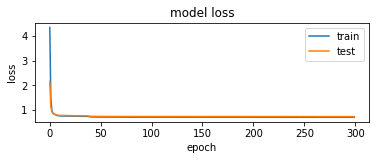

In [84]:
# plot mse during training
plt.subplot(212)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**Make prediction**

In [85]:
predictions = autoencoder.predict(X1_test)
mse = np.mean(np.power(X1_test - predictions, 2), axis=1)
df_error = pd.DataFrame({'reconstruction_error': mse,'true_class': y1_test})
df_error.describe()

,reconstruction_error,true_class
count,71202.000000,71202.000000
mean,0.735381,0.001531
std,3.307728,0.039096
min,0.085768,0.000000
25%,0.260123,0.000000
50%,0.396576,0.000000
75%,0.625902,0.000000
max,393.252215,1.000000


**ROC Curve for Model evalution **

In [123]:
# Import modules
from sklearn.metrics import auc, roc_curve,precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_recall_fscore_support

fpr_rf, tpr_rf, thresholds_rf  = roc_curve(df_error.true_class, df_error.reconstruction_error)
auc_rf  = auc(false_positive_rate, true_positive_rate)

# Plot the roc curve

#plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

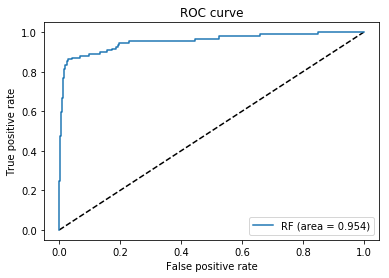

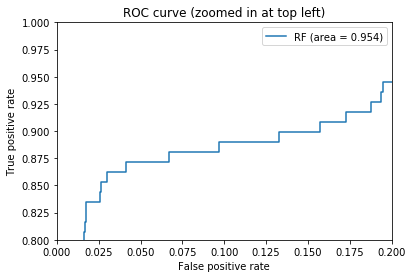

In [125]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

 **2.Generational Adversarial Networks (GANs)**

In [2]:
from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

In [3]:
df = pd.read_csv('../input/creditcard.csv')

NameError: name 'pd' is not defined

In [92]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [94]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [95]:
df = df.drop('Time',axis=1)

In [96]:
X = df.drop('Class',axis=1).values 
y = df['Class'].values

In [97]:
X.shape

(284807, 29)

In [98]:
X -= X.min(axis=0)
X /= X.max(axis=0)

In [99]:
X.mean()

0.5213456986251124

In [100]:
X.shape

(284807, 29)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

In [8]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input, Embedding, multiply, BatchNormalization
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers
from keras.utils import to_categorical

#K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 10


In [9]:
def build_generator(latent_dim,data_dim):

        model = Sequential()

        model.add(Dense(16, input_dim=latent_dim))
    
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(32, input_dim=latent_dim))
    
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(data_dim,activation='tanh'))

        model.summary()

        noise = Input(shape=(latent_dim,))
        img = model(noise)

        return Model(noise, img)

In [10]:
generator = build_generator(latent_dim=10,data_dim=29)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [105]:
def build_discriminator(data_dim,num_classes):
    model = Sequential()
    model.add(Dense(31,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dropout(0.25))
    model.add(Dense(16,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    
    model.summary()
    img = Input(shape=(data_dim,))
    features = model(img)
    valid = Dense(1, activation="sigmoid")(features)
    label = Dense(num_classes+1, activation="softmax")(features)
    return Model(img, [valid, label])

In [106]:
discriminator = build_discriminator(data_dim=29,num_classes=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 31)                930       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 31)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 31)                124       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16)                0         
Total params: 1,566
Trainable params: 1,504
Non-trainable params: 62
_________________________________________________________________


In [107]:
optimizer = Adam(0.0002, 0.5)
discriminator.compile(loss=['binary_crossentropy', 'categorical_crossentropy'],
    loss_weights=[0.5, 0.5],
    optimizer=optimizer,
    metrics=['accuracy'])

In [108]:
noise = Input(shape=(10,))
img = generator(noise)
discriminator.trainable = False
valid,_ = discriminator(img)
combined = Model(noise , valid)
combined.compile(loss=['binary_crossentropy'],
    optimizer=optimizer)

In [109]:
X_train.shape

(256326, 29)

In [110]:
from imblearn.under_sampling import RandomUnderSampler

In [111]:
rus = RandomUnderSampler(random_state=42)

In [112]:
X_res, y_res = rus.fit_sample(X, y)

In [113]:
X_res.shape

(984, 29)

In [114]:
X_res -= X_res.min()
X_res /= X_res.max()

In [115]:
X_test -= X_test.min()
X_test /= X_test.max()

In [116]:
X_test_res, y_test_res = rus.fit_sample(X_test,y_test)

In [117]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [118]:
y_res.shape

(984,)

In [119]:
def train(X_train,y_train,
          X_test,y_test,
          generator,discriminator,
          combined,
          num_classes,
          epochs, 
          batch_size=128):
    
    f1_progress = []
    d_loss_progress = []
    half_batch = int(batch_size / 2)

    noise_until = epochs

    # Class weights:
    # To balance the difference in occurences of digit class labels.
    # 50% of labels that the discriminator trains on are 'fake'.
    # Weight = 1 / frequency
    cw1 = {0: 1, 1: 1}
    cw2 = {i: num_classes / half_batch for i in range(num_classes)}
    cw2[num_classes] = 1 / half_batch 
    d_loss_sum = 0

    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random half batch of images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

        # Sample noise and generate a half batch of new images
        noise = np.random.normal(0, 1, (half_batch, 10))
        gen_imgs = generator.predict(noise)

        valid = np.ones((half_batch, 1))
        fake = np.zeros((half_batch, 1))

        labels = to_categorical(y_train[idx], num_classes=num_classes+1)
        fake_labels = to_categorical(np.full((half_batch, 1), num_classes), num_classes=num_classes+1)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, [valid, labels], class_weight=[cw1, cw2])
        d_loss_fake = discriminator.train_on_batch(gen_imgs, [fake, fake_labels], class_weight=[cw1, cw2])
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, 10))
        validity = np.ones((batch_size, 1))

        # Train the generator
        g_loss = combined.train_on_batch(noise, validity, class_weight=[cw1, cw2])

        # Plot the progress
        print ("%d [D loss: %f, acc: %.2f%%, op_acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[3], 100*d_loss[4], g_loss))
        d_loss_sum += 100*d_loss[3]
        
        if epoch % 10 == 0:
            _,y_pred = discriminator.predict(X_test,batch_size=batch_size)
            #print(y_pred.shape)
            y_pred = np.argmax(y_pred[:,:-1],axis=1)
            
            f1 = f1_score(y_test,y_pred)
            print('Epoch: {}, F1: {:.5f}, F1P: {}'.format(epoch,f1,len(f1_progress)))
            cm = confusion_matrix(y_test, y_pred)

            print(cm)
            print(d_loss_sum/10)
            d_loss_progress.append(d_loss_sum/10)
            f1_progress.append(f1)
            d_loss_sum = 0
    
    return f1_progress, d_loss_progress

In [120]:
f1_p, d_l_p = train(X_res,y_res,
             X_test,y_test,
             generator,discriminator,
             combined,
             num_classes=2,
             epochs=2000, 
             batch_size=128)

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


0 [D loss: 0.439273, acc: 46.09%, op_acc: 25.78%] [G loss: 1.320194]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch: 0, F1: 0.00000, F1P: 0
[[28432     0]
 [   49     0]]
4.609375
1 [D loss: 0.458729, acc: 42.97%, op_acc: 32.81%] [G loss: 1.345867]
2 [D loss: 0.432406, acc: 45.31%, op_acc: 32.03%] [G loss: 1.374045]
3 [D loss: 0.414599, acc: 52.34%, op_acc: 27.34%] [G loss: 1.258445]
4 [D loss: 0.414661, acc: 49.22%, op_acc: 24.22%] [G loss: 1.313827]
5 [D loss: 0.432671, acc: 45.31%, op_acc: 35.16%] [G loss: 1.283000]
6 [D loss: 0.419204, acc: 52.34%, op_acc: 27.34%] [G loss: 1.280554]
7 [D loss: 0.410513, acc: 50.00%, op_acc: 35.16%] [G loss: 1.297687]
8 [D loss: 0.428231, acc: 44.53%, op_acc: 28.12%] [G loss: 1.289062]
9 [D loss: 0.425601, acc: 40.62%, op_acc: 35.16%] [G loss: 1.253601]
10 [D loss: 0.411546, acc: 46.88%, op_acc: 28.91%] [G loss: 1.252549]
Epoch: 10, F1: 0.00000, F1P: 1
[[28432     0]
 [   49     0]]
46.953125
11 [D loss: 0.389894, acc: 52.34%, op_acc: 26.56%] [G loss: 1.352904]
12 [D loss: 0.428136, acc: 46.88%, op_acc: 29.69%] [G loss: 1.221840]
13 [D loss: 0.424125, acc: 

Epoch: 110, F1: 0.00000, F1P: 11
[[28431     1]
 [   49     0]]
61.484375
111 [D loss: 0.330666, acc: 61.72%, op_acc: 36.72%] [G loss: 0.986442]
112 [D loss: 0.326207, acc: 67.19%, op_acc: 37.50%] [G loss: 1.098424]
113 [D loss: 0.339435, acc: 57.81%, op_acc: 41.41%] [G loss: 1.167237]
114 [D loss: 0.333675, acc: 63.28%, op_acc: 34.38%] [G loss: 1.069698]
115 [D loss: 0.337626, acc: 58.59%, op_acc: 43.75%] [G loss: 1.096326]
116 [D loss: 0.327990, acc: 61.72%, op_acc: 39.84%] [G loss: 1.131739]
117 [D loss: 0.330292, acc: 65.62%, op_acc: 42.19%] [G loss: 1.073673]
118 [D loss: 0.327369, acc: 64.06%, op_acc: 38.28%] [G loss: 1.101388]
119 [D loss: 0.345829, acc: 61.72%, op_acc: 41.41%] [G loss: 1.044009]
120 [D loss: 0.320606, acc: 69.53%, op_acc: 38.28%] [G loss: 1.059374]
Epoch: 120, F1: 0.00000, F1P: 12
[[28431     1]
 [   49     0]]
63.125
121 [D loss: 0.335666, acc: 60.94%, op_acc: 38.28%] [G loss: 1.030490]
122 [D loss: 0.344629, acc: 60.16%, op_acc: 39.06%] [G loss: 1.019127]
123

Epoch: 220, F1: 0.00000, F1P: 22
[[28429     3]
 [   49     0]]
74.609375
221 [D loss: 0.312876, acc: 71.09%, op_acc: 42.19%] [G loss: 1.113902]
222 [D loss: 0.310157, acc: 69.53%, op_acc: 45.31%] [G loss: 1.119971]
223 [D loss: 0.283697, acc: 81.25%, op_acc: 48.44%] [G loss: 1.038315]
224 [D loss: 0.303693, acc: 72.66%, op_acc: 45.31%] [G loss: 1.069418]
225 [D loss: 0.318245, acc: 72.66%, op_acc: 39.84%] [G loss: 1.078764]
226 [D loss: 0.287372, acc: 79.69%, op_acc: 41.41%] [G loss: 0.991671]
227 [D loss: 0.313268, acc: 68.75%, op_acc: 42.97%] [G loss: 1.017268]
228 [D loss: 0.296776, acc: 78.12%, op_acc: 50.78%] [G loss: 1.013637]
229 [D loss: 0.316803, acc: 67.19%, op_acc: 39.84%] [G loss: 1.064598]
230 [D loss: 0.292497, acc: 78.91%, op_acc: 44.53%] [G loss: 1.057845]
Epoch: 230, F1: 0.00000, F1P: 23
[[28428     4]
 [   49     0]]
73.984375
231 [D loss: 0.316082, acc: 68.75%, op_acc: 40.62%] [G loss: 1.009931]
232 [D loss: 0.313846, acc: 70.31%, op_acc: 45.31%] [G loss: 0.959412]


Epoch: 330, F1: 0.08718, F1P: 33
[[28108   324]
 [   32    17]]
76.328125
331 [D loss: 0.291032, acc: 77.34%, op_acc: 49.22%] [G loss: 1.039620]
332 [D loss: 0.297165, acc: 75.78%, op_acc: 46.09%] [G loss: 0.975238]
333 [D loss: 0.288724, acc: 78.91%, op_acc: 50.78%] [G loss: 1.075425]
334 [D loss: 0.281513, acc: 79.69%, op_acc: 50.00%] [G loss: 1.043426]
335 [D loss: 0.289987, acc: 78.91%, op_acc: 46.09%] [G loss: 1.017455]
336 [D loss: 0.303233, acc: 70.31%, op_acc: 46.88%] [G loss: 1.065117]
337 [D loss: 0.285475, acc: 75.78%, op_acc: 46.09%] [G loss: 0.955422]
338 [D loss: 0.305158, acc: 78.12%, op_acc: 53.91%] [G loss: 0.973585]
339 [D loss: 0.295238, acc: 77.34%, op_acc: 46.09%] [G loss: 1.038388]
340 [D loss: 0.293079, acc: 74.22%, op_acc: 52.34%] [G loss: 0.950986]
Epoch: 340, F1: 0.09091, F1P: 34
[[28061   371]
 [   29    20]]
76.640625
341 [D loss: 0.291393, acc: 73.44%, op_acc: 46.09%] [G loss: 1.040584]
342 [D loss: 0.304104, acc: 74.22%, op_acc: 49.22%] [G loss: 1.002494]


Epoch: 440, F1: 0.64286, F1P: 44
[[28424     8]
 [   22    27]]
76.09375
441 [D loss: 0.280007, acc: 82.81%, op_acc: 57.03%] [G loss: 1.059179]
442 [D loss: 0.292911, acc: 75.78%, op_acc: 54.69%] [G loss: 1.026759]
443 [D loss: 0.289094, acc: 79.69%, op_acc: 54.69%] [G loss: 1.050599]
444 [D loss: 0.286273, acc: 75.78%, op_acc: 53.12%] [G loss: 0.992553]
445 [D loss: 0.308168, acc: 74.22%, op_acc: 50.78%] [G loss: 0.972076]
446 [D loss: 0.289424, acc: 77.34%, op_acc: 49.22%] [G loss: 1.009663]
447 [D loss: 0.287988, acc: 76.56%, op_acc: 50.00%] [G loss: 1.062248]
448 [D loss: 0.290317, acc: 78.12%, op_acc: 48.44%] [G loss: 1.041183]
449 [D loss: 0.294616, acc: 74.22%, op_acc: 54.69%] [G loss: 1.055647]
450 [D loss: 0.287096, acc: 79.69%, op_acc: 50.78%] [G loss: 1.023714]
Epoch: 450, F1: 0.65060, F1P: 45
[[28425     7]
 [   22    27]]
77.421875
451 [D loss: 0.293491, acc: 78.12%, op_acc: 47.66%] [G loss: 1.033367]
452 [D loss: 0.303462, acc: 75.00%, op_acc: 49.22%] [G loss: 0.997701]
4

Epoch: 550, F1: 0.63415, F1P: 55
[[28425     7]
 [   23    26]]
76.953125
551 [D loss: 0.268874, acc: 77.34%, op_acc: 53.91%] [G loss: 1.107217]
552 [D loss: 0.269439, acc: 80.47%, op_acc: 52.34%] [G loss: 1.077429]
553 [D loss: 0.285996, acc: 75.00%, op_acc: 52.34%] [G loss: 1.117886]
554 [D loss: 0.276258, acc: 78.91%, op_acc: 51.56%] [G loss: 1.063781]
555 [D loss: 0.283735, acc: 75.78%, op_acc: 59.38%] [G loss: 1.149819]
556 [D loss: 0.282540, acc: 78.91%, op_acc: 53.91%] [G loss: 1.036330]
557 [D loss: 0.291621, acc: 76.56%, op_acc: 52.34%] [G loss: 1.136509]
558 [D loss: 0.287189, acc: 82.03%, op_acc: 54.69%] [G loss: 1.143502]
559 [D loss: 0.290647, acc: 75.00%, op_acc: 48.44%] [G loss: 1.053633]
560 [D loss: 0.263214, acc: 81.25%, op_acc: 55.47%] [G loss: 1.080675]
Epoch: 560, F1: 0.65060, F1P: 56
[[28425     7]
 [   22    27]]
78.125
561 [D loss: 0.289963, acc: 74.22%, op_acc: 50.00%] [G loss: 1.043382]
562 [D loss: 0.294152, acc: 75.00%, op_acc: 57.81%] [G loss: 1.096473]
563

Epoch: 660, F1: 0.66667, F1P: 66
[[28423     9]
 [   20    29]]
81.640625
661 [D loss: 0.261226, acc: 79.69%, op_acc: 57.81%] [G loss: 1.163163]
662 [D loss: 0.272022, acc: 84.38%, op_acc: 57.81%] [G loss: 1.180544]
663 [D loss: 0.264927, acc: 81.25%, op_acc: 53.12%] [G loss: 1.131633]
664 [D loss: 0.271054, acc: 81.25%, op_acc: 48.44%] [G loss: 1.154496]
665 [D loss: 0.275418, acc: 81.25%, op_acc: 57.03%] [G loss: 1.072587]
666 [D loss: 0.282839, acc: 75.00%, op_acc: 57.03%] [G loss: 1.130714]
667 [D loss: 0.271391, acc: 78.12%, op_acc: 62.50%] [G loss: 1.169757]
668 [D loss: 0.250074, acc: 84.38%, op_acc: 60.94%] [G loss: 1.129741]
669 [D loss: 0.274488, acc: 80.47%, op_acc: 54.69%] [G loss: 1.162747]
670 [D loss: 0.279456, acc: 77.34%, op_acc: 45.31%] [G loss: 1.149152]
Epoch: 670, F1: 0.66667, F1P: 67
[[28419    13]
 [   18    31]]
80.3125
671 [D loss: 0.260855, acc: 81.25%, op_acc: 57.03%] [G loss: 1.175675]
672 [D loss: 0.269800, acc: 83.59%, op_acc: 48.44%] [G loss: 1.134532]
67

Epoch: 770, F1: 0.49007, F1P: 77
[[28367    65]
 [   12    37]]
87.1875
771 [D loss: 0.251622, acc: 83.59%, op_acc: 55.47%] [G loss: 1.283982]
772 [D loss: 0.242399, acc: 87.50%, op_acc: 52.34%] [G loss: 1.283470]
773 [D loss: 0.244962, acc: 85.94%, op_acc: 57.81%] [G loss: 1.220985]
774 [D loss: 0.253736, acc: 82.03%, op_acc: 55.47%] [G loss: 1.228182]
775 [D loss: 0.242618, acc: 89.06%, op_acc: 62.50%] [G loss: 1.291252]
776 [D loss: 0.242430, acc: 86.72%, op_acc: 60.94%] [G loss: 1.265543]
777 [D loss: 0.241228, acc: 84.38%, op_acc: 55.47%] [G loss: 1.215397]
778 [D loss: 0.230924, acc: 86.72%, op_acc: 57.03%] [G loss: 1.310868]
779 [D loss: 0.252321, acc: 91.41%, op_acc: 60.16%] [G loss: 1.220450]
780 [D loss: 0.235673, acc: 85.94%, op_acc: 60.94%] [G loss: 1.264753]
Epoch: 780, F1: 0.48366, F1P: 78
[[28365    67]
 [   12    37]]
86.328125
781 [D loss: 0.236396, acc: 87.50%, op_acc: 57.81%] [G loss: 1.231012]
782 [D loss: 0.241119, acc: 86.72%, op_acc: 55.47%] [G loss: 1.277851]
78

Epoch: 880, F1: 0.63717, F1P: 88
[[28404    28]
 [   13    36]]
86.875
881 [D loss: 0.239411, acc: 88.28%, op_acc: 67.97%] [G loss: 1.264777]
882 [D loss: 0.237234, acc: 85.94%, op_acc: 65.62%] [G loss: 1.349771]
883 [D loss: 0.233885, acc: 87.50%, op_acc: 60.94%] [G loss: 1.334297]
884 [D loss: 0.245547, acc: 88.28%, op_acc: 60.94%] [G loss: 1.357322]
885 [D loss: 0.239973, acc: 85.94%, op_acc: 60.94%] [G loss: 1.345417]
886 [D loss: 0.234419, acc: 86.72%, op_acc: 63.28%] [G loss: 1.320424]
887 [D loss: 0.227775, acc: 89.84%, op_acc: 64.84%] [G loss: 1.286868]
888 [D loss: 0.223297, acc: 90.62%, op_acc: 69.53%] [G loss: 1.371237]
889 [D loss: 0.235991, acc: 85.94%, op_acc: 65.62%] [G loss: 1.367841]
890 [D loss: 0.231997, acc: 85.94%, op_acc: 68.75%] [G loss: 1.278630]
Epoch: 890, F1: 0.66055, F1P: 89
[[28408    24]
 [   13    36]]
87.5
891 [D loss: 0.229175, acc: 90.62%, op_acc: 65.62%] [G loss: 1.275317]
892 [D loss: 0.217959, acc: 93.75%, op_acc: 67.19%] [G loss: 1.337792]
893 [D l

Epoch: 990, F1: 0.65909, F1P: 99
[[28422    10]
 [   20    29]]
89.53125
991 [D loss: 0.218321, acc: 86.72%, op_acc: 64.06%] [G loss: 1.421102]
992 [D loss: 0.217718, acc: 89.06%, op_acc: 70.31%] [G loss: 1.463548]
993 [D loss: 0.223118, acc: 90.62%, op_acc: 68.75%] [G loss: 1.411489]
994 [D loss: 0.214203, acc: 92.97%, op_acc: 70.31%] [G loss: 1.367789]
995 [D loss: 0.229805, acc: 85.94%, op_acc: 68.75%] [G loss: 1.361691]
996 [D loss: 0.213967, acc: 92.97%, op_acc: 68.75%] [G loss: 1.485482]
997 [D loss: 0.219956, acc: 89.06%, op_acc: 72.66%] [G loss: 1.313976]
998 [D loss: 0.218412, acc: 90.62%, op_acc: 69.53%] [G loss: 1.415665]
999 [D loss: 0.215106, acc: 89.84%, op_acc: 64.84%] [G loss: 1.377048]
1000 [D loss: 0.203243, acc: 92.97%, op_acc: 64.06%] [G loss: 1.417707]
Epoch: 1000, F1: 0.65909, F1P: 100
[[28422    10]
 [   20    29]]
90.078125
1001 [D loss: 0.221779, acc: 87.50%, op_acc: 67.19%] [G loss: 1.397211]
1002 [D loss: 0.230778, acc: 86.72%, op_acc: 58.59%] [G loss: 1.4104

Epoch: 1100, F1: 0.65909, F1P: 110
[[28422    10]
 [   20    29]]
91.40625
1101 [D loss: 0.210646, acc: 91.41%, op_acc: 63.28%] [G loss: 1.436804]
1102 [D loss: 0.213748, acc: 90.62%, op_acc: 60.16%] [G loss: 1.442624]
1103 [D loss: 0.216522, acc: 90.62%, op_acc: 68.75%] [G loss: 1.499758]
1104 [D loss: 0.223303, acc: 91.41%, op_acc: 71.09%] [G loss: 1.520886]
1105 [D loss: 0.204760, acc: 93.75%, op_acc: 69.53%] [G loss: 1.428138]
1106 [D loss: 0.200941, acc: 93.75%, op_acc: 78.91%] [G loss: 1.525294]
1107 [D loss: 0.199197, acc: 92.97%, op_acc: 72.66%] [G loss: 1.478100]
1108 [D loss: 0.195599, acc: 90.62%, op_acc: 67.19%] [G loss: 1.495077]
1109 [D loss: 0.208167, acc: 89.84%, op_acc: 71.09%] [G loss: 1.494311]
1110 [D loss: 0.210271, acc: 93.75%, op_acc: 69.53%] [G loss: 1.571679]
Epoch: 1110, F1: 0.64368, F1P: 111
[[28422    10]
 [   21    28]]
91.875
1111 [D loss: 0.207943, acc: 91.41%, op_acc: 71.88%] [G loss: 1.550260]
1112 [D loss: 0.199515, acc: 92.97%, op_acc: 66.41%] [G loss

Epoch: 1210, F1: 0.64368, F1P: 121
[[28422    10]
 [   21    28]]
93.359375
1211 [D loss: 0.201005, acc: 89.84%, op_acc: 73.44%] [G loss: 1.591401]
1212 [D loss: 0.197690, acc: 92.97%, op_acc: 68.75%] [G loss: 1.647089]
1213 [D loss: 0.193339, acc: 92.19%, op_acc: 65.62%] [G loss: 1.660390]
1214 [D loss: 0.199711, acc: 92.19%, op_acc: 69.53%] [G loss: 1.632230]
1215 [D loss: 0.178544, acc: 93.75%, op_acc: 72.66%] [G loss: 1.624750]
1216 [D loss: 0.184132, acc: 96.88%, op_acc: 73.44%] [G loss: 1.664973]
1217 [D loss: 0.193750, acc: 91.41%, op_acc: 71.88%] [G loss: 1.729358]
1218 [D loss: 0.195341, acc: 92.97%, op_acc: 71.88%] [G loss: 1.701758]
1219 [D loss: 0.189099, acc: 96.88%, op_acc: 80.47%] [G loss: 1.675376]
1220 [D loss: 0.193521, acc: 92.97%, op_acc: 66.41%] [G loss: 1.624372]
Epoch: 1220, F1: 0.66667, F1P: 122
[[28425     7]
 [   21    28]]
93.203125
1221 [D loss: 0.204638, acc: 92.97%, op_acc: 69.53%] [G loss: 1.560717]
1222 [D loss: 0.188439, acc: 94.53%, op_acc: 69.53%] [G 

Epoch: 1320, F1: 0.65854, F1P: 132
[[28426     6]
 [   22    27]]
93.75
1321 [D loss: 0.187771, acc: 90.62%, op_acc: 76.56%] [G loss: 1.674509]
1322 [D loss: 0.175029, acc: 94.53%, op_acc: 78.91%] [G loss: 1.785025]
1323 [D loss: 0.180750, acc: 92.97%, op_acc: 79.69%] [G loss: 1.700236]
1324 [D loss: 0.188475, acc: 93.75%, op_acc: 78.12%] [G loss: 1.702653]
1325 [D loss: 0.172791, acc: 92.97%, op_acc: 78.91%] [G loss: 1.621672]
1326 [D loss: 0.180515, acc: 92.97%, op_acc: 83.59%] [G loss: 1.722350]
1327 [D loss: 0.180581, acc: 94.53%, op_acc: 77.34%] [G loss: 1.806652]
1328 [D loss: 0.161037, acc: 96.09%, op_acc: 80.47%] [G loss: 1.754701]
1329 [D loss: 0.173117, acc: 96.09%, op_acc: 82.03%] [G loss: 1.665685]
1330 [D loss: 0.165894, acc: 96.09%, op_acc: 83.59%] [G loss: 1.782271]
Epoch: 1330, F1: 0.65854, F1P: 133
[[28426     6]
 [   22    27]]
94.0625
1331 [D loss: 0.154532, acc: 96.09%, op_acc: 83.59%] [G loss: 1.774730]
1332 [D loss: 0.188134, acc: 96.09%, op_acc: 74.22%] [G loss: 

Epoch: 1430, F1: 0.60000, F1P: 143
[[28425     7]
 [   25    24]]
94.375
1431 [D loss: 0.176082, acc: 96.88%, op_acc: 81.25%] [G loss: 1.829209]
1432 [D loss: 0.189156, acc: 90.62%, op_acc: 79.69%] [G loss: 1.719738]
1433 [D loss: 0.171223, acc: 96.09%, op_acc: 81.25%] [G loss: 1.772650]
1434 [D loss: 0.189111, acc: 88.28%, op_acc: 79.69%] [G loss: 1.723874]
1435 [D loss: 0.174951, acc: 94.53%, op_acc: 79.69%] [G loss: 1.856129]
1436 [D loss: 0.180632, acc: 91.41%, op_acc: 83.59%] [G loss: 1.641011]
1437 [D loss: 0.186707, acc: 92.19%, op_acc: 79.69%] [G loss: 1.784826]
1438 [D loss: 0.163922, acc: 98.44%, op_acc: 82.81%] [G loss: 1.675341]
1439 [D loss: 0.166939, acc: 95.31%, op_acc: 83.59%] [G loss: 1.598096]
1440 [D loss: 0.168198, acc: 96.88%, op_acc: 81.25%] [G loss: 1.664464]
Epoch: 1440, F1: 0.60000, F1P: 144
[[28425     7]
 [   25    24]]
94.0625
1441 [D loss: 0.169239, acc: 96.09%, op_acc: 85.16%] [G loss: 1.759923]
1442 [D loss: 0.185482, acc: 90.62%, op_acc: 82.03%] [G loss:

Epoch: 1540, F1: 0.64286, F1P: 154
[[28424     8]
 [   22    27]]
94.765625
1541 [D loss: 0.166263, acc: 95.31%, op_acc: 76.56%] [G loss: 1.870601]
1542 [D loss: 0.166977, acc: 95.31%, op_acc: 82.81%] [G loss: 1.859480]
1543 [D loss: 0.164497, acc: 92.19%, op_acc: 76.56%] [G loss: 1.961644]
1544 [D loss: 0.161671, acc: 93.75%, op_acc: 83.59%] [G loss: 1.930991]
1545 [D loss: 0.171369, acc: 93.75%, op_acc: 81.25%] [G loss: 1.894809]
1546 [D loss: 0.171597, acc: 89.84%, op_acc: 84.38%] [G loss: 1.854507]
1547 [D loss: 0.159101, acc: 94.53%, op_acc: 83.59%] [G loss: 1.810658]
1548 [D loss: 0.156298, acc: 93.75%, op_acc: 79.69%] [G loss: 1.780566]
1549 [D loss: 0.160433, acc: 93.75%, op_acc: 80.47%] [G loss: 1.907278]
1550 [D loss: 0.160748, acc: 94.53%, op_acc: 85.94%] [G loss: 1.833849]
Epoch: 1550, F1: 0.62791, F1P: 155
[[28422    10]
 [   22    27]]
93.671875
1551 [D loss: 0.161601, acc: 94.53%, op_acc: 83.59%] [G loss: 2.029425]
1552 [D loss: 0.167771, acc: 93.75%, op_acc: 79.69%] [G 

Epoch: 1650, F1: 0.64286, F1P: 165
[[28405    27]
 [   13    36]]
95.15625
1651 [D loss: 0.160988, acc: 94.53%, op_acc: 84.38%] [G loss: 1.874793]
1652 [D loss: 0.167859, acc: 94.53%, op_acc: 77.34%] [G loss: 1.898547]
1653 [D loss: 0.169398, acc: 95.31%, op_acc: 84.38%] [G loss: 2.011700]
1654 [D loss: 0.157010, acc: 95.31%, op_acc: 82.81%] [G loss: 1.876058]
1655 [D loss: 0.165227, acc: 92.97%, op_acc: 82.03%] [G loss: 1.823733]
1656 [D loss: 0.154128, acc: 95.31%, op_acc: 83.59%] [G loss: 1.929787]
1657 [D loss: 0.166493, acc: 96.09%, op_acc: 83.59%] [G loss: 1.828442]
1658 [D loss: 0.154077, acc: 96.88%, op_acc: 83.59%] [G loss: 1.985140]
1659 [D loss: 0.151195, acc: 97.66%, op_acc: 90.62%] [G loss: 1.942921]
1660 [D loss: 0.167035, acc: 92.19%, op_acc: 82.03%] [G loss: 2.006615]
Epoch: 1660, F1: 0.58065, F1P: 166
[[28393    39]
 [   13    36]]
95.078125
1661 [D loss: 0.156339, acc: 94.53%, op_acc: 81.25%] [G loss: 1.812258]
1662 [D loss: 0.134178, acc: 96.88%, op_acc: 88.28%] [G l

Epoch: 1760, F1: 0.34259, F1P: 176
[[28302   130]
 [   12    37]]
95.546875
1761 [D loss: 0.151982, acc: 93.75%, op_acc: 83.59%] [G loss: 1.801238]
1762 [D loss: 0.173433, acc: 92.19%, op_acc: 80.47%] [G loss: 1.757133]
1763 [D loss: 0.138892, acc: 97.66%, op_acc: 82.81%] [G loss: 1.969935]
1764 [D loss: 0.166479, acc: 93.75%, op_acc: 83.59%] [G loss: 1.782692]
1765 [D loss: 0.166703, acc: 91.41%, op_acc: 78.91%] [G loss: 1.875260]
1766 [D loss: 0.160418, acc: 95.31%, op_acc: 75.78%] [G loss: 1.866571]
1767 [D loss: 0.161694, acc: 94.53%, op_acc: 80.47%] [G loss: 1.876744]
1768 [D loss: 0.152965, acc: 95.31%, op_acc: 82.81%] [G loss: 1.707852]
1769 [D loss: 0.143165, acc: 97.66%, op_acc: 83.59%] [G loss: 1.788542]
1770 [D loss: 0.165826, acc: 95.31%, op_acc: 77.34%] [G loss: 1.773594]
Epoch: 1770, F1: 0.27211, F1P: 177
[[28227   205]
 [    9    40]]
94.6875
1771 [D loss: 0.142452, acc: 97.66%, op_acc: 76.56%] [G loss: 1.853199]
1772 [D loss: 0.150194, acc: 96.88%, op_acc: 80.47%] [G lo

Epoch: 1870, F1: 0.04892, F1P: 187
[[26726  1706]
 [    5    44]]
96.328125
1871 [D loss: 0.152331, acc: 96.09%, op_acc: 85.94%] [G loss: 1.798626]
1872 [D loss: 0.156646, acc: 96.88%, op_acc: 87.50%] [G loss: 1.830360]
1873 [D loss: 0.150262, acc: 96.88%, op_acc: 78.91%] [G loss: 1.896928]
1874 [D loss: 0.142504, acc: 96.09%, op_acc: 82.03%] [G loss: 1.869640]
1875 [D loss: 0.163855, acc: 93.75%, op_acc: 77.34%] [G loss: 1.854237]
1876 [D loss: 0.158404, acc: 95.31%, op_acc: 78.91%] [G loss: 1.812320]
1877 [D loss: 0.138660, acc: 96.88%, op_acc: 83.59%] [G loss: 1.832885]
1878 [D loss: 0.150155, acc: 94.53%, op_acc: 80.47%] [G loss: 1.804918]
1879 [D loss: 0.153943, acc: 95.31%, op_acc: 79.69%] [G loss: 1.762948]
1880 [D loss: 0.146802, acc: 95.31%, op_acc: 79.69%] [G loss: 1.810932]
Epoch: 1880, F1: 0.03885, F1P: 188
[[26260  2172]
 [    5    44]]
95.703125
1881 [D loss: 0.148715, acc: 96.88%, op_acc: 84.38%] [G loss: 1.904424]
1882 [D loss: 0.141839, acc: 96.09%, op_acc: 84.38%] [G 

Epoch: 1980, F1: 0.05924, F1P: 198
[[27105  1327]
 [    7    42]]
96.71875
1981 [D loss: 0.148891, acc: 93.75%, op_acc: 86.72%] [G loss: 1.730840]
1982 [D loss: 0.133690, acc: 98.44%, op_acc: 87.50%] [G loss: 1.770597]
1983 [D loss: 0.124453, acc: 97.66%, op_acc: 88.28%] [G loss: 1.921994]
1984 [D loss: 0.146343, acc: 96.88%, op_acc: 87.50%] [G loss: 1.878499]
1985 [D loss: 0.153995, acc: 96.09%, op_acc: 82.81%] [G loss: 1.791133]
1986 [D loss: 0.138209, acc: 96.88%, op_acc: 89.06%] [G loss: 1.912784]
1987 [D loss: 0.132412, acc: 96.88%, op_acc: 88.28%] [G loss: 1.778281]
1988 [D loss: 0.143245, acc: 96.88%, op_acc: 82.81%] [G loss: 1.894458]
1989 [D loss: 0.143847, acc: 96.88%, op_acc: 82.81%] [G loss: 1.850421]
1990 [D loss: 0.131077, acc: 96.88%, op_acc: 89.06%] [G loss: 1.817165]
Epoch: 1990, F1: 0.08155, F1P: 199
[[27493   939]
 [    7    42]]
96.71875
1991 [D loss: 0.139862, acc: 96.88%, op_acc: 90.62%] [G loss: 1.840080]
1992 [D loss: 0.144049, acc: 97.66%, op_acc: 84.38%] [G lo

Text(0,0.5,'F1 Score Validation')

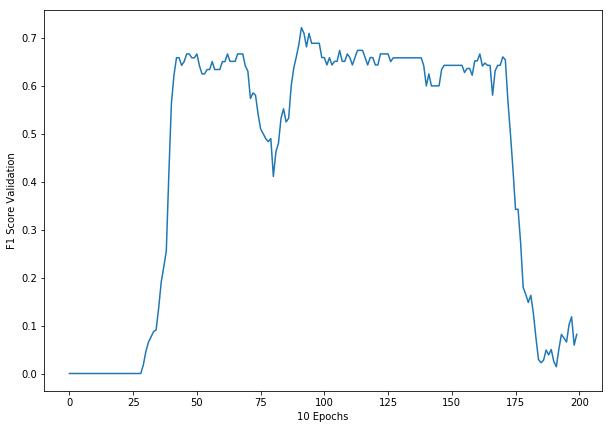

In [121]:
fig = plt.figure(figsize=(10,7))
plt.plot(f1_p)
plt.xlabel('10 Epochs')
plt.ylabel('F1 Score Validation')

Text(0,0.5,'Accuracy')

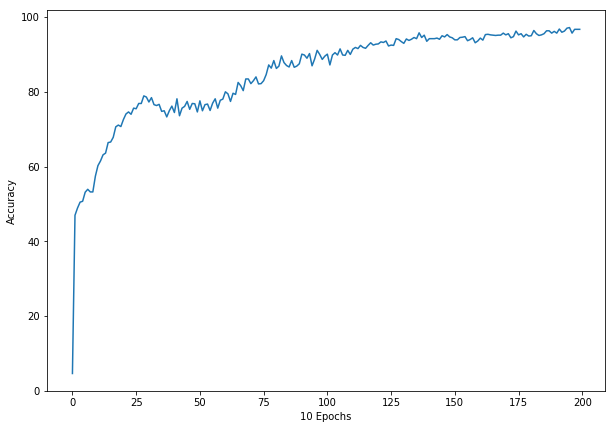

In [122]:
fig = plt.figure(figsize=(10,7))
plt.plot(d_l_p)
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')